  # **MACHINE LEARNING PROJECT**

  **By Santhosh Kumar Elumalai Srinivasan**

# **INTRODUCTION**
**This dataset providews details about how admission for MBA affect based on other features, including Gpa, Gmat, work_exp, gender and so on.**
# **GOAL**
**This is clssification dataset, and my main goal is to predict the future admission status and for that I used different model to train**

# **ORGIN OF THE DATASET**
**This dataset is collected from Kaggle from the following link https://www.kaggle.com/datasets/taweilo/mba-admission-dataset**

**DETAILS OF THE FILE AS FOLLOWS:**
       

*      File Name :MBA.csv
*      Number of Training data : 6194
*      Number of features : 08
*      Number of Target feature : 01







# **Problem Statement**
 **The underlying business problem is to predict which people will get admission for MBA course. So if we train the model and find out, we can sell this to education consultancy. So for the new people who want to get into MBA, based on their feature such as gpa, gmat, work experience and so on, the trained model will give us rough porbability of getting a MBA seat. This is very beneficial for the consultancy,thus customer satisfaction will increase, thus positive reviwes also increase. So custoemr satisfaction and positive review depended on our trained model. Hence, consultancy will benefit a lot**

 **I used admission as my target feature, and I train the model with the matadata or all features with different model. Afterwards, if a new customer comes with their data or the feature(in this case gpa, gmat, work exp and so on), I feed into the trained model, which gives probability.**  

# **1st step:**
1.   **Here importing pandas library to read csv file in pandas dataframe**
2.   **Importing numpy to do mathematics operations**
3. **Importing matplotlib to visulise and analysis data for understanding the dataset evenmore**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sna
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score
from sklearn import metrics

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler



In [ ]:
mba = pd.read_csv('/content/MBA.csv')
mba = mba.replace(to_replace=np.nan, value="Decline")
mba.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Decline
2,3,Female,True,3.30,Business,Decline,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Decline
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Decline


# **Explore and Analyse data to understand better**

In [ ]:
mba = mba.drop("application_id", axis = 1) # I feature engineered because application id is not used to train the model.

In [ ]:
mba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   international  6194 non-null   bool   
 2   gpa            6194 non-null   float64
 3   major          6194 non-null   object 
 4   race           6194 non-null   object 
 5   gmat           6194 non-null   float64
 6   work_exp       6194 non-null   float64
 7   work_industry  6194 non-null   object 
 8   admission      6194 non-null   object 
dtypes: bool(1), float64(3), object(5)
memory usage: 393.3+ KB


In [ ]:
mba.describe()

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


In [ ]:
mba.isnull().sum()

,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


In [ ]:
mba.shape

(6194, 9)

In [ ]:
mba.admission.value_counts()



,count
admission,
Decline,5194
Admit,900
Waitlist,100


<Axes: xlabel='admission', ylabel='number of people'>

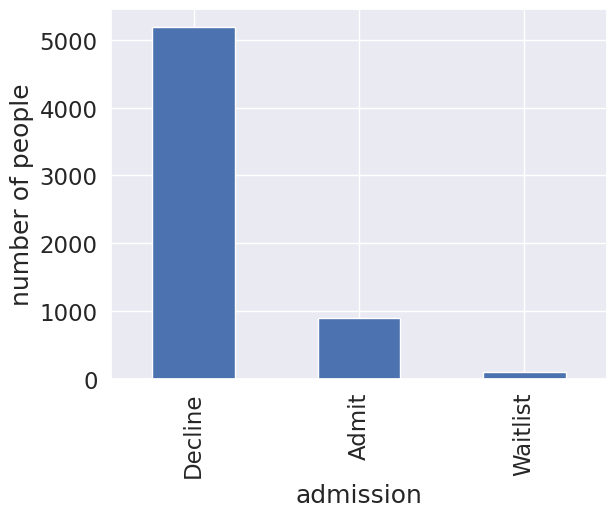

In [ ]:
e = mba.admission.value_counts()
e.plot.bar(ylabel ='number of people')

<Axes: >

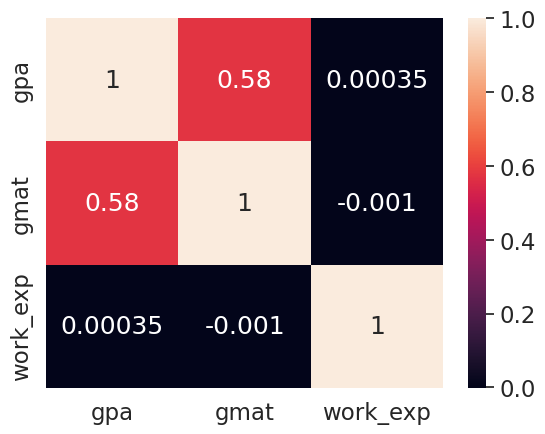

In [ ]:
heat_graph = mba.select_dtypes(include = ['float64', 'int64'])
sna.heatmap(heat_graph.corr(), annot = True)

In [ ]:
from dataclasses import replace # here I changed genders expliclty from string to int
for i in mba["gender"]:
  if i == "Male":
     mba= mba.replace("Male", 1)
  elif i == "Female":
     mba = mba.replace("Female", 0)

mba.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,1,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Decline
2,0,True,3.30,Business,Decline,710.0,5.0,Technology,Admit
3,1,False,3.47,STEM,Black,690.0,6.0,Technology,Decline
4,1,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Decline


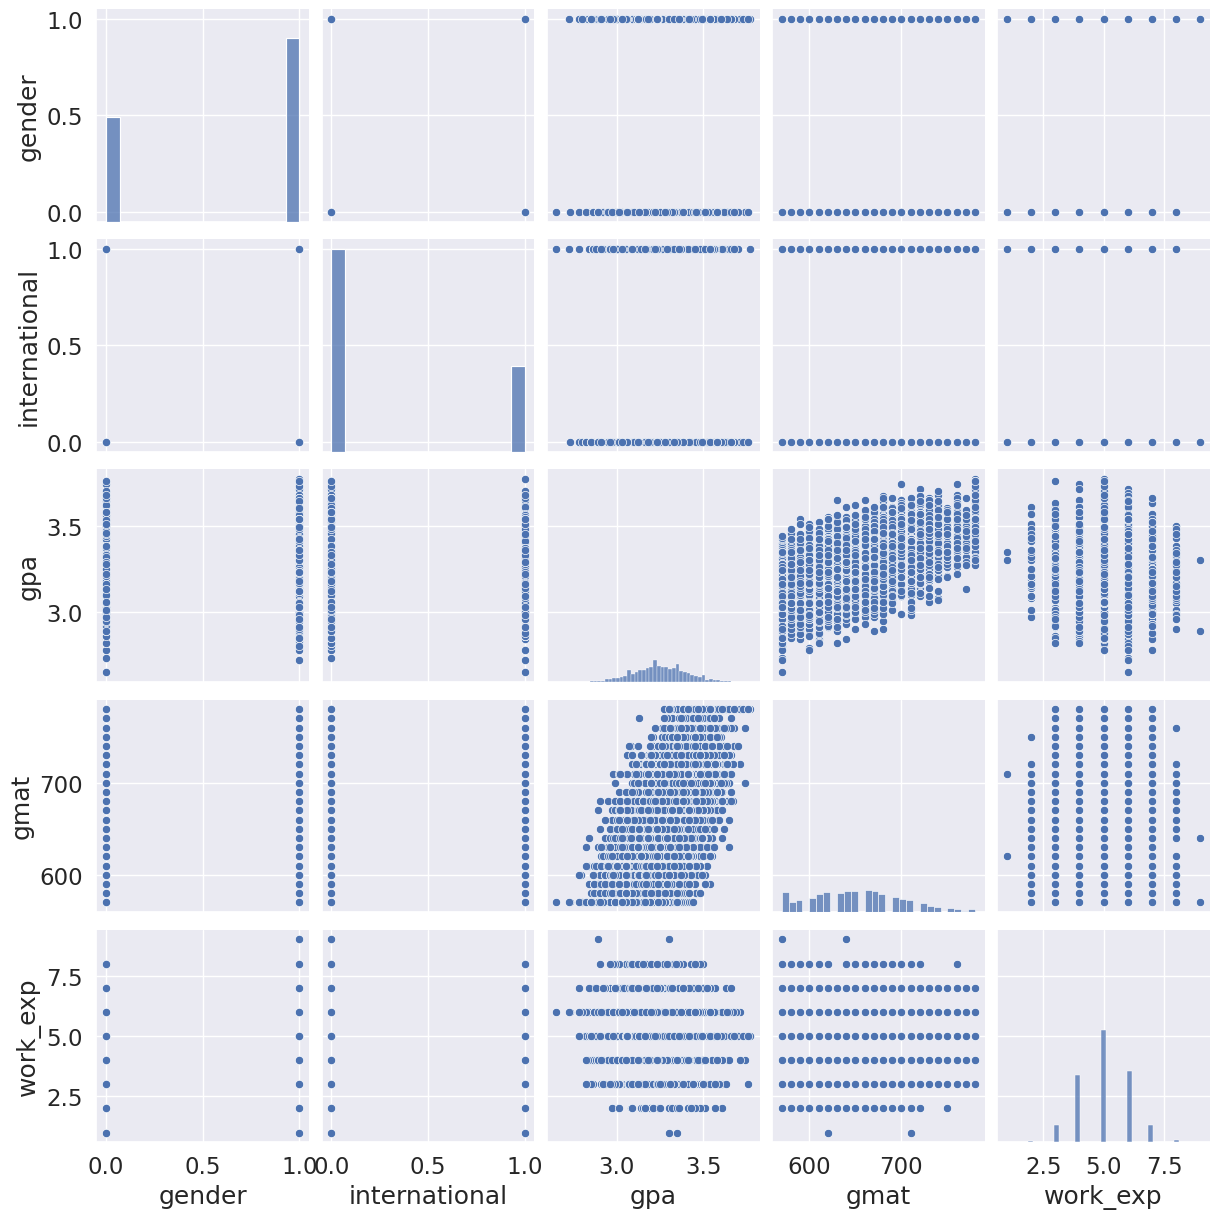

In [ ]:
sna.pairplot(mba)


# **Data Preprocessing**

1.  Imbalancing the data
2.  Dealing the missing data
3.  Applying one-hot encoding to categorical variables
4.  spliting the data for trian,  validation and test
5.  scaling the data for normilization.


Applying

In [ ]:
ov = mba.drop('admission', axis=1)
ev = pd.get_dummies(ov, drop_first = True) # Here get_dummies converts object or categorical  variables into 0 and 1 and(drop_first) drops the categorical feature
y_sm = mba['admission']

# Here we are using SMOTE to deal with imbalnced dataset, by randomly assigned values which are not part of the dataset
smote = SMOTE(random_state=42)
X_smoe, y_smoe = smote.fit_resample(ev, y_sm)



In [ ]:

# here we are concating the resampled  data  with numerically converted categorical columns
mba_b = pd.concat([pd.DataFrame(X_smoe, columns=ev.columns), pd.DataFrame(y_smoe, columns=['admission'])], axis=1)

# we suffle this dataset to reduce bias and incraese training more efficently
# I learned from the ML community
mba_b = mba_b.sample(frac=1, random_state=42).reset_index(drop=True)


print(mba_b.head())

   gender  international       gpa   gmat  work_exp  major_Humanities  \
0       0           True  3.351549  700.0  5.288734              True   
1       0           True  3.268258  620.0  5.517149             False   
2       0           True  3.289865  690.0  6.000000              True   
3       0          False  3.340000  710.0  5.000000             False   
4       1          False  3.385952  780.0  5.000000             False   

   major_STEM  race_Black  race_Decline  race_Hispanic  ...  \
0        True       False          True          False  ...   
1        True       False          True          False  ...   
2       False       False          True           True  ...   
3       False       False         False          False  ...   
4        True       False         False          False  ...   

   work_industry_Investment Banking  work_industry_Investment Management  \
0                             False                                False   
1                             

In [ ]:
mm = mba_b.drop('admission',axis=1) # here we are droping our target feature

In [ ]:

X = mm
X = pd  .get_dummies(X, drop_first = True)  # Apply 0 and 1 to our features
y = mba_b['admission']
y.head()


,admission
0,Waitlist
1,Waitlist
2,Admit
3,Decline
4,Admit


<Axes: >

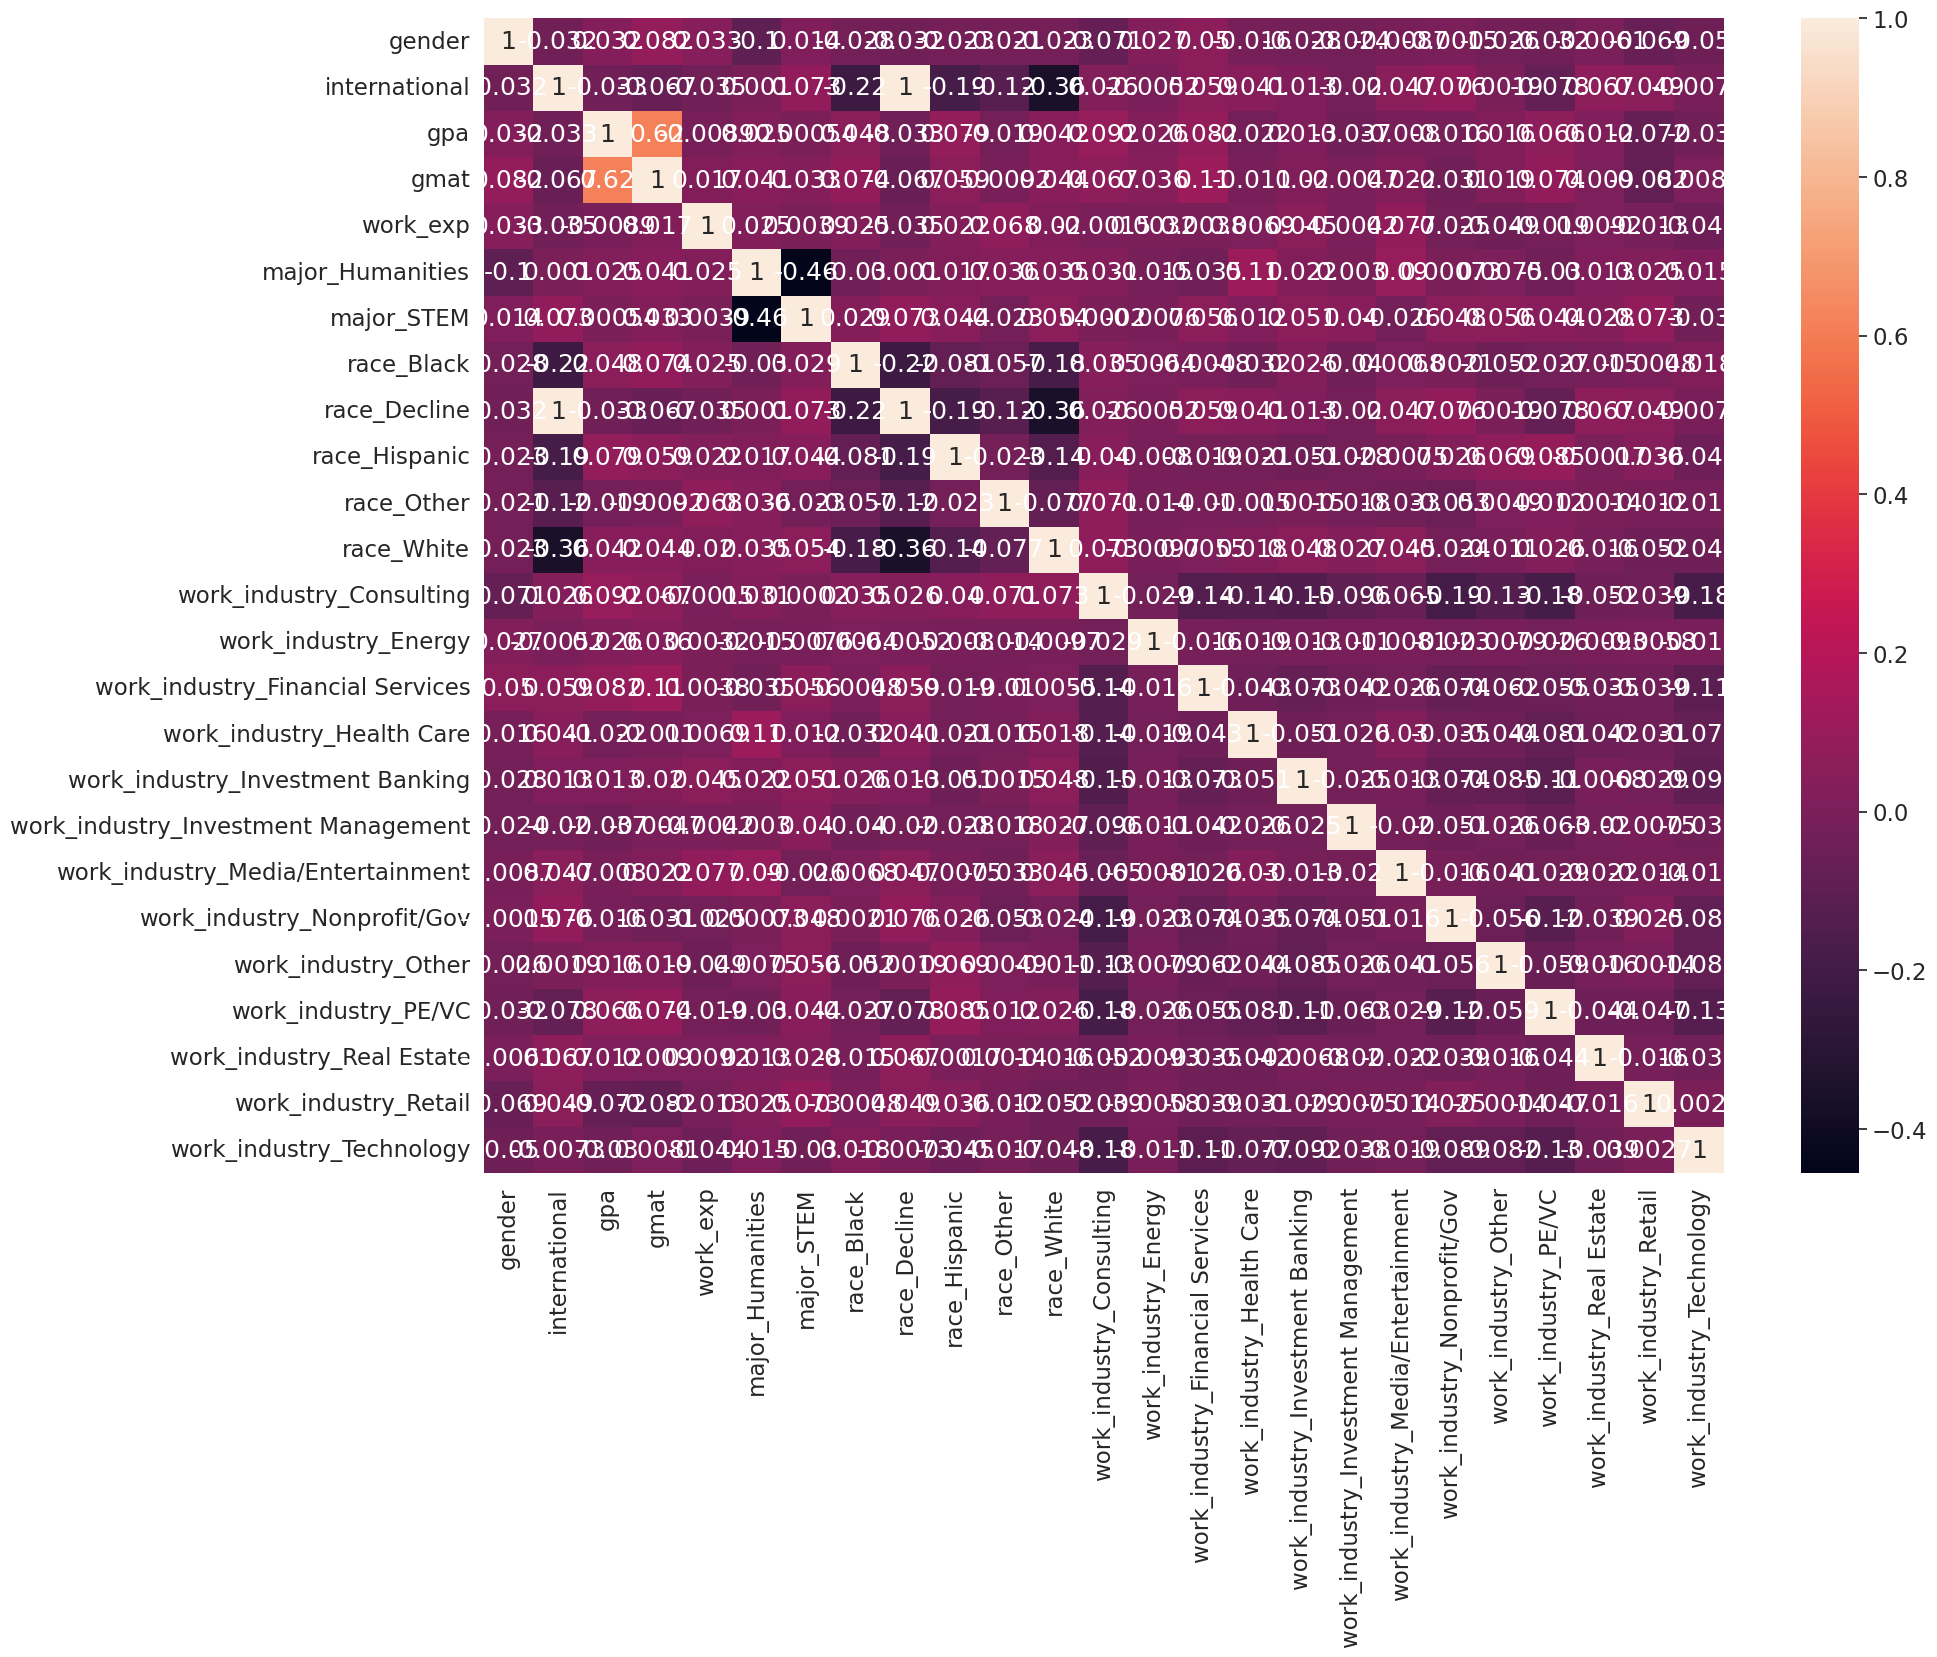

In [ ]:
#This plot represent whole x featurs after one-hot encoding to get familirize.
plt.figure(figsize=(20,15))
sna.heatmap(X.corr(), annot = True)

In [ ]:
X.head()

,gender,international,gpa,gmat,work_exp,major_Humanities,major_STEM,race_Black,race_Decline,race_Hispanic,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,0,True,3.351549,700.0,5.288734,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,True,3.268258,620.0,5.517149,False,True,False,True,False,...,False,False,False,False,True,True,False,False,False,False
2,0,True,3.289865,690.0,6.000000,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,0,False,3.340000,710.0,5.000000,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,False,3.385952,780.0,5.000000,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
# Here we are splitting the data into train and test
X_train_p, X_test, y_train_p, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

#Here we are splitting the data from splitted data from X to check validation
X_train, X_val, y_train, y_val = train_test_split(X_train_p, y_train_p, test_size=0.4, random_state=42)
#Here is the shape of our splitted data
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)


(5609, 25)
(6233, 25)
(6233,)
(5609,)
(3740, 25)
(3740,)


In [ ]:
#Here we used standardscaler to standardise features or scaling features. It works by computing mean feature -(subtracting) X orginal value in the fature and divided by standard deviation
# what it does is, it gives values center and near mean
# It helps to get optimal parameters fastly and Gradient descent runs fastly
nor = StandardScaler()
X_train_s = nor.fit_transform(X_train)
X_val_s = nor.transform(X_val)
X_test_s = nor.transform(X_test)

# **MACHINE LEARNING MODELS TO TRAIN**

1.   Logistic Regression model and its accuracy.
2.   Decision Trees model and its accuracy  .
3.   Support vector machine model and its accuracy  .
4.   K-Nearest Neighbors model and its  accuracy.
5.   Random Forest model and its accuracy



# **Logistic Regression**





In [ ]:
# Logistic Regression workes by taking input feature(X_train_s) and randomly intilize values  for the parameters w and b after that,
#it plugs in sigmoid function(1/1+e**X) to calculated estimated probabilities for each training examples, and then, it uses (binary
#cross entropy cost function because we are working in binary class) to measure eror for each and every training data to get overall
#error or cost. Furthermore, after we got intial cost function score, for that particular w and b values, Gradient descent runs by
#substracting alpha value and multiply with derivative of w and derivative of b, to get new w and b value, after that, new w and b
#plugs in the mx+b linear function, and so on. These above steps runs until it gets optimal value or fullfils max_iteration or there
#is no decraings in cost function.

## ABove I explined indepth on how it gets opotimal value

Loges = LogisticRegression(tol = 0.01, max_iter = 1000) # Here I changed hyper_parameters suck as alpha valeu and max_iteration because,
                                                      # inti it has 100 max_iteration, so it failed, after i put 500 it fauled and
                                                      # finally, it gets optimal value for 1000 itertaions.


Loges.fit(X_train_s, y_train)   # here it trains the model like how I said in the above comment This is to predict using validation data,
cross_pred = Log.predict(X_val_s) # which we split

cross_val = accuracy_score(y_val, cross_pred) # here we get accuracy score for validation data
print(f"Validation Accuracy: {cross_val:.3%}")
tra = Loges.predict(X_test_s)
score = accuracy_score(y_test, tra)
print(f"Test Score :{score:.3%}") # accuracy score for test data
y_test_predictions =Loges.predict(X_test_s)
pre_ci_sion = precision_score(y_test, y_test_predictions, average = 'weighted')
re_call = recall_score(y_test, y_test_predictions, average = 'micro')
f1_score_ = f1_score(y_test, y_test_predictions, average = 'weighted')
print(f"Recall = {re_call:.3%}")
print(f"Precision = {pre_ci_sion:.4%}")
print(f"F1 Score = {f1_score_:.3%}")


#SInce the scores were almost the same, it did not overfit nor underfit because if test accuracy substaitially more than Validatiion score,
# then we can say it was overfit, since this was not, we can say its perfect.


Validation Accuracy: 73.770%
Test Score :73.672%
Recall = 73.672%
Precision = 73.3357%
F1 Score = 73.456%


SVM

In [ ]:
#Support vector machine gaol is to find hyperplane by using wx+ b linear fomrmula, with ranom intilised value. After that, the margin will be selcted between
# the line and the closest data point. So Support vector machines goal is to maximize this margin. The wide the plane is, the
# better the algorithm is. SVM automatically handles either to use soft margin or hard margin. # C is regularise coefficient and
# it used to give penality for misclassification or going over the margin.With C and hing loss  to punish missclassifcation and
#going over the margin. It uses dual problem ton find the best descion boundary,which classify the label correctly.

clf = svm.SVC()
clf.fit(X_train_s, y_train)
svm_p = clf.predict(X_val_s)
cv = accuracy_score(y_val, svm_p)
print(f"VAlidation accuracy for SVM ; {cv:.5%}")
stra = clf.predict(X_test_s)
stra_score = accuracy_score(y_test, stra)
print(f"Test Score for SVM : {stra_score:.4%}")
y_test_pr = clf.predict(X_test_s)

pre_ci_sion = precision_score(y_test, y_test_pr, average = 'weighted')
re_call = recall_score(y_test, y_test_pr, average = 'micro')
f1_score_ = f1_score(y_test, y_test_pr, average = 'weighted')
print(f"Recall = {re_call:.3%}")
print(f"Precision = {pre_ci_sion:.4%}")
print(f"F1 Score = {f1_score_:.3%}")





VAlidation accuracy for SVM ; 82.83422%
Test Score for SVM : 82.8173%
Recall = 82.817%
Precision = 82.7843%
F1 Score = 82.800%


Decision Tree

In [ ]:
#General Overview of Decision Trees.nodes located inside Decision trees represent festures of my dataset;whereas, its decsion
# is branch which connects leaf nodes(it is output of the test on the feature). Those leaf are responsible for the final output.
# The root node splits all the features to get best feature sepration of data. It works by taking the highest score of the
#  feture.Once done, we use to predict new values by inputing into desciosn tree, which travel forom root to leaf node, and the
# leaf node gives output for that.
clf = tree.DecisionTreeClassifier()
hyper_parameter = {'max_depth': [2, 7, 10], 'min_samples_split': [3, 5, 7]}
parm_tuning = GridSearchCV(clf, hyper_parameter, cv=5, scoring='accuracy')
parm_tuning.fit(X_train_s, y_train)
d_p = parm_tuning.predict(X_val)
aa = accuracy_score(y_val, d_p)
print(f"Best Hyperparameters: {parm_tuning.best_params_}")
print(f"Validation Accuracy: {aa:.3%}")
y_test_p =parm_tuning.predict(X_test_s)
pre_ci_sion = precision_score(y_test, y_test_p, average = 'weighted')

re_call   =   recall_score(y_test, y_test_p, average = 'micro')
f1_score_   =  f1_score(y_test, y_test_p, average = 'weighted')
print(f"Recall = {re_call:.3%}")
print(f"Precision = {pre_ci_sion:.4%}")
print(f"F1 Score = {f1_score_:.3%}")



Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5}
Validation Accuracy: 31.952%
Recall = 79.673%
Precision = 80.6256%
F1 Score = 79.617%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Random Forest Classifier

In [ ]:
#n the ensemble learning Random Forest approach, multiple decision trees are generated by various examples of the training data.
#Each of these trees have trained using a bootstrapping sample and; as a result, only a few characteristics are considered at
#every internal node for a split. Additionally, the predictions are made by combining the decision values of all trees, meaning
#that the maximum votes are taken for classification or, the average of the decisions is made in case of regression etc.
#In this way, such a tree is unlikely to over-fit and is generally more accurate than those built in isolation. The advantages
# of Random Forests can also be best understood when viewpoint shifts to classification or regression tasks. Random Forest model
# helps in conjoining insights on the features that are of importance too.


clf = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=0)
clf.fit(X_train_s,y_train)
rf = clf.predict(X_val_s)
rf_acur = accuracy_score(y_val, rf)
print(f"VAlidation accuracy for Random Forest ; {rf_acur:.5%}")
rf_tra_acc = clf.predict(X_test_s)
tra_score = accuracy_score(y_test, rf_tra_acc)
print(f"Test Score for Random Forest : {tra_score:.4%}")
y_test_ =clf.predict(X_test_s)
pre_ci_sion = precision_score(y_test, y_test_, average = 'macro')

re_call = recall_score( y_test, y_test_, average = 'micro')
f1_score_ = f1_score( y_test, y_test_p, average = 'micro')

print(f"Recall = {re_call:.3%}")
print(f"Precision = {pre_ci_sion:.4%}")
print(f"F1 Score = {f1_score_:.3%}")



VAlidation accuracy for Random Forest ; 80.00000%
Test Score for Random Forest : 79.1112%
Recall = 79.111%
Precision = 80.5482%
F1 Score = 79.673%


KNN

In [ ]:

neigh = KNeighborsClassifier(n_neighbors=9, leaf_size=35, weights='uniform')
l = neigh.fit(X_train_s,y_train)
knnp = neigh.predict(X_val_s)
knn_ac = accuracy_score(y_val, knnp)
print(f"VAlidation accuracy for Random Forest ; {knn_ac:.5%}")
knn_trai_acc = l.predict(X_test_s)
tra_score = accuracy_score(y_test, knn_trai_acc)
print(f"Test Score for Random Forest : {tra_score:.4%}")
yprehat = neigh.predict(X_test_s)
pre_ci_sion = precision_score(y_test, yprehat, average = 'weighted')
#it tests the score for precision
re_call = recall_score(y_test, yprehat, average = 'micro')
#for Recall
f1_score_ = f1_score(y_test, yprehat, average = 'weighted')
#for f1_score
print(f"Recall := {re_call:.3%}, ")
print(f"Precision := {pre_ci_sion:.4%}")
print(f"F1 Score := {f1_score_:.3%}")




VAlidation accuracy for Random Forest ; 78.36898%
Test Score for Random Forest : 77.9721%
Recall := 77.972%, 
Precision := 77.6401%
F1 Score := 77.652%


# **From the above models, SVM has the gihest score in all the accuracy methods such recall, f1, precision, validation and test scores**

# **Below is the confusion matrix to see how much true negatives and false positives we got, and how much True positive and false negatives we got.**

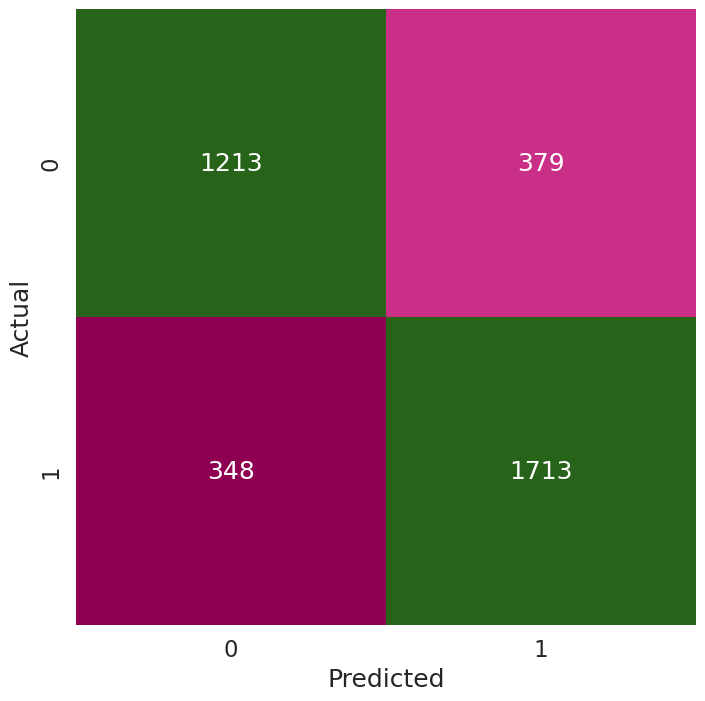

In [ ]:

conf_matrix[2] = 0
conf_matrix[:-1,-1] = 0
confusion_matri = pd.DataFrame(conf_matrix)
cf = confusion_matri.drop(2, axis=0).drop(2, axis=1)
plt.figure(figsize=(8,8))
sna.set(font_scale = 1.5)

ss = sna.heatmap(cf, cbar = False,  vmax = 600, fmt = 'd', annot = True, cmap = 'PiYG')
ss.set_ylabel("Actual")
ss.set_xlabel("Predicted")
plt.show()

**This confusion matrix tells us, that out of 1976 data, it predicts 1713 as correctly predicted True negatives. 348 fasly predicted false positives. 1213 predicted true positive and  379 predicted false negative.**



# **Overall**

**The limitations of the proposed solution is number of training data is not enough.The outcome of this project will be a big advantage for people who want pursue MBA, so people can have their realistic hopes for the mba seats from our trained model, which gives probability. The most informative features of my model are gmat score, gpa score, work experience, work industry and major.**